# LUNG CANCER PREDICTION


## Using Logistic Regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

### Data Collection and Preprocessing 

In [3]:
dataframe=pd.read_csv('survey lung cancer.csv')
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
dataframe['LUNG_CANCER']=np.where(dataframe['LUNG_CANCER']=='YES',1,0)
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [5]:
dataframe['GENDER']=np.where(dataframe['GENDER']=='M',1,0)
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [6]:
dataframe.shape


(309, 16)

In [7]:
dataframe.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
dataframe.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [9]:
dataframe.groupby('LUNG_CANCER').mean()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,,,
0,0.435897,60.743590,1.487179,1.333333,1.307692,1.256410,1.358974,1.487179,1.128205,1.230769,1.179487,1.256410,1.564103,1.128205,1.307692
1,0.537037,62.951852,1.574074,1.603704,1.525926,1.537037,1.525926,1.700000,1.618519,1.603704,1.611111,1.625926,1.651852,1.518519,1.592593


In [10]:
dataframe['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

## EDA (Exploratory Data Analysis)

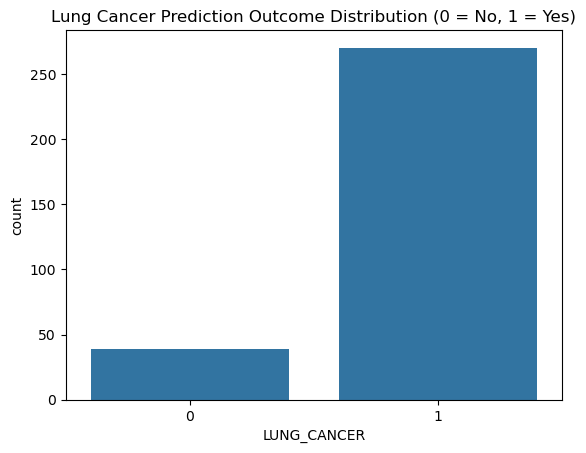

In [11]:
sns.countplot(x='LUNG_CANCER', data=dataframe)
plt.title("Lung Cancer Prediction Outcome Distribution (0 = No, 1 = Yes)")
plt.show()

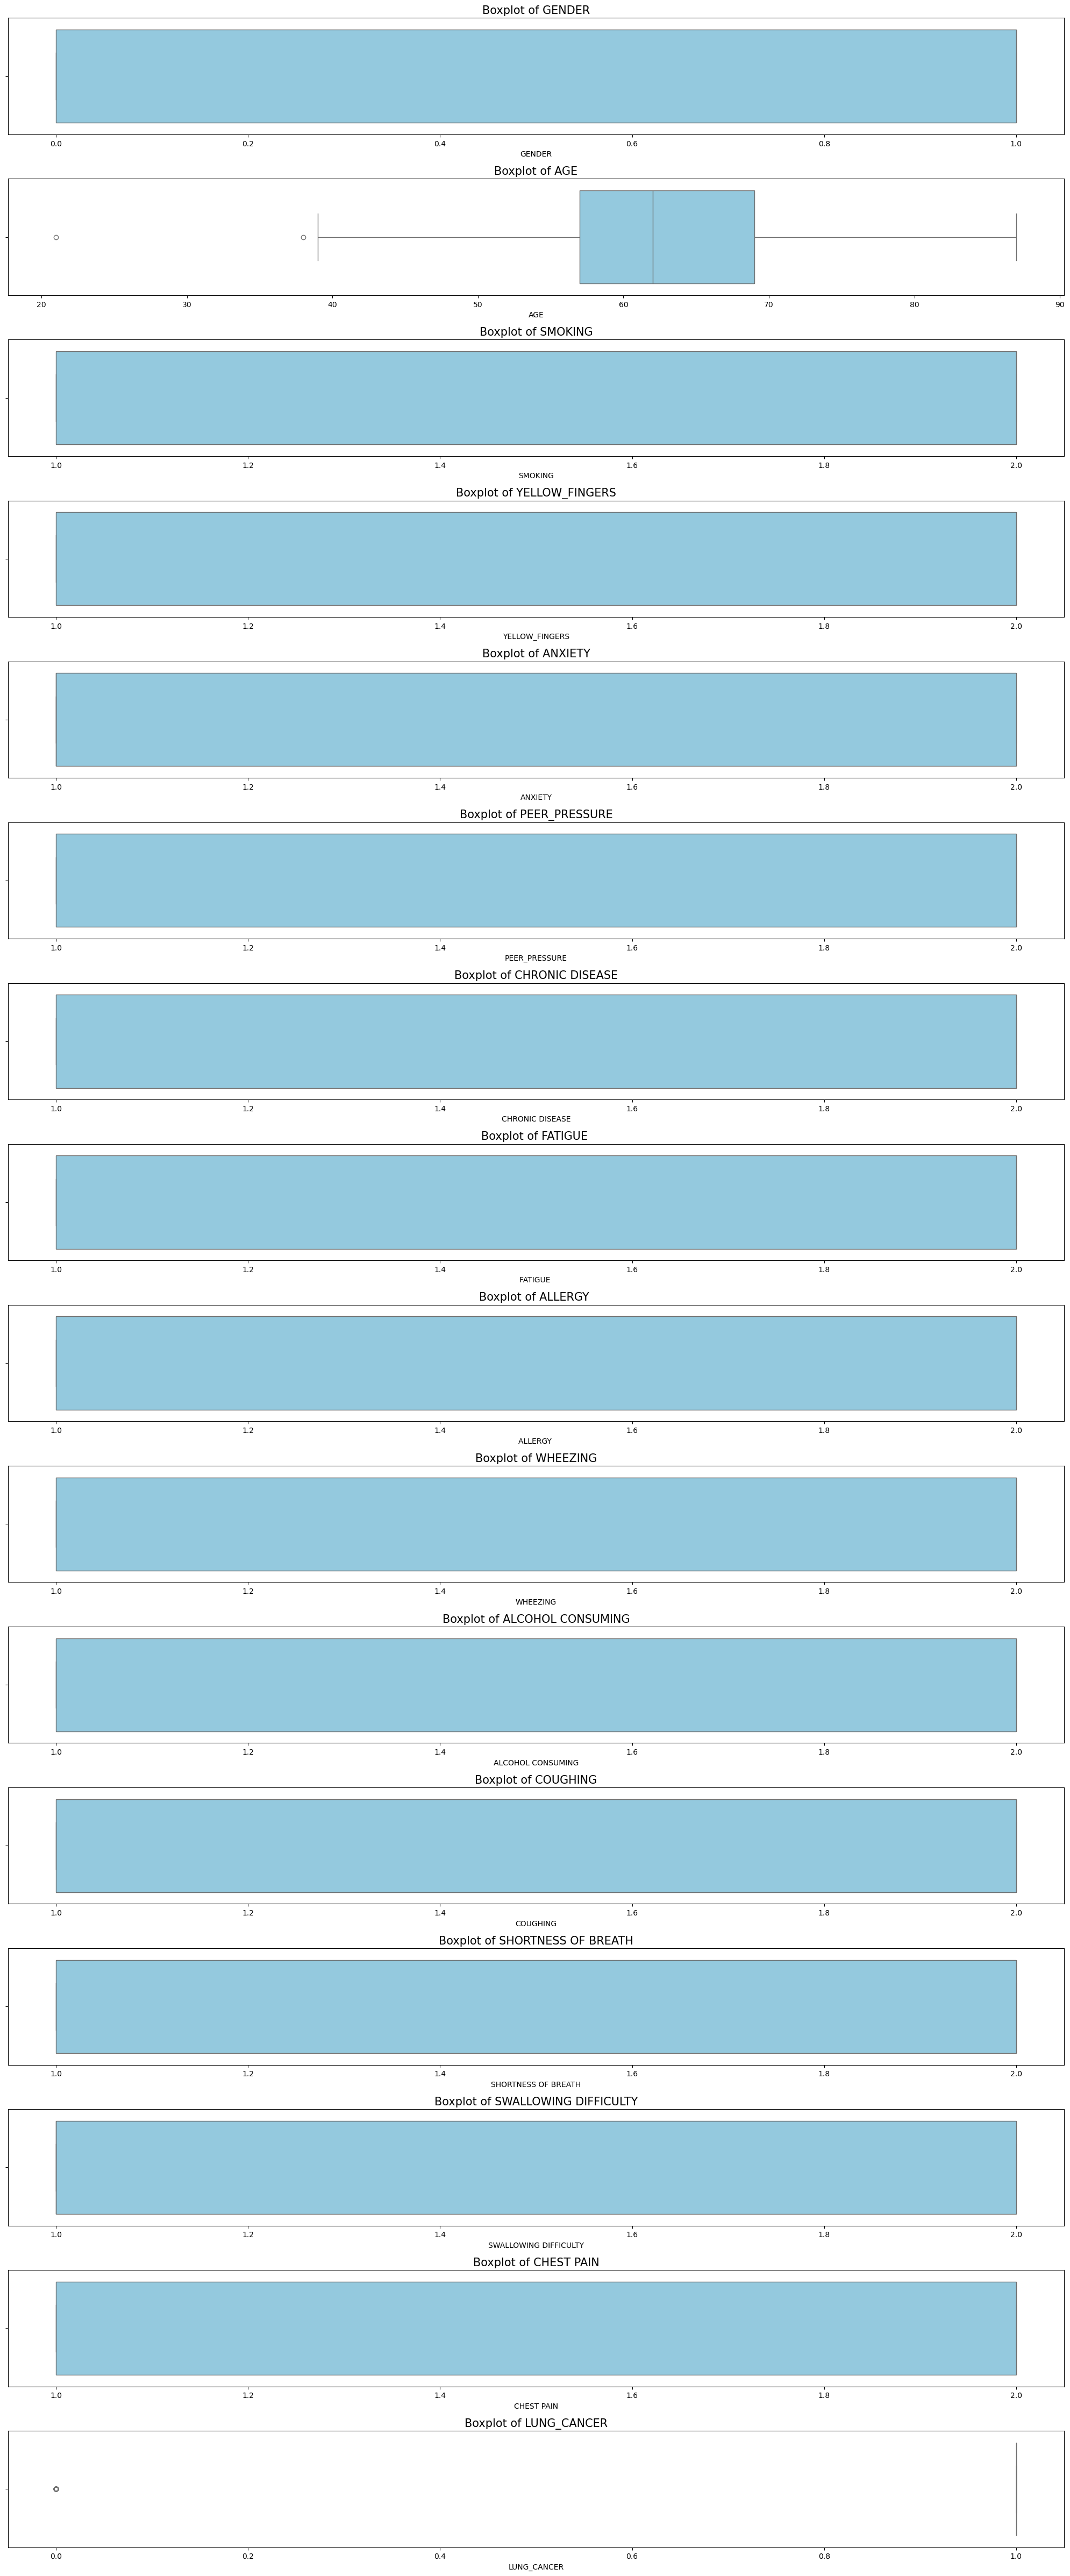

In [12]:
numeric_df = dataframe.select_dtypes(include='number')

# Set the figure size
plt.figure(figsize=(20, len(numeric_df.columns) * 3))

for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(len(numeric_df.columns), 1, i)
    sns.boxplot(x=numeric_df[column], color='skyblue')
    plt.title(f'Boxplot of {column}', fontsize=15)
    plt.tight_layout()

plt.show()

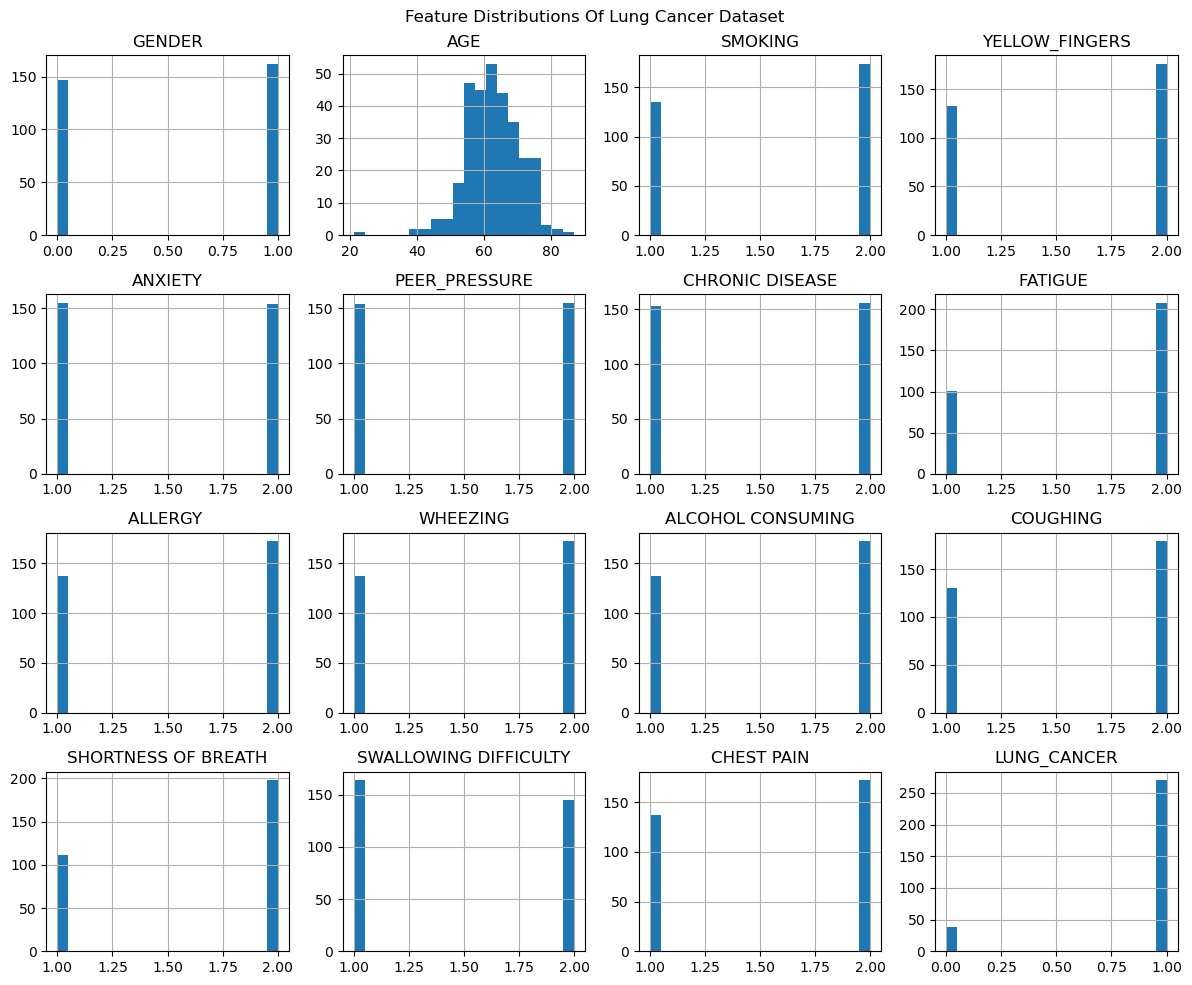

In [13]:
dataframe.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions Of Lung Cancer Dataset")
plt.tight_layout()
plt.show()


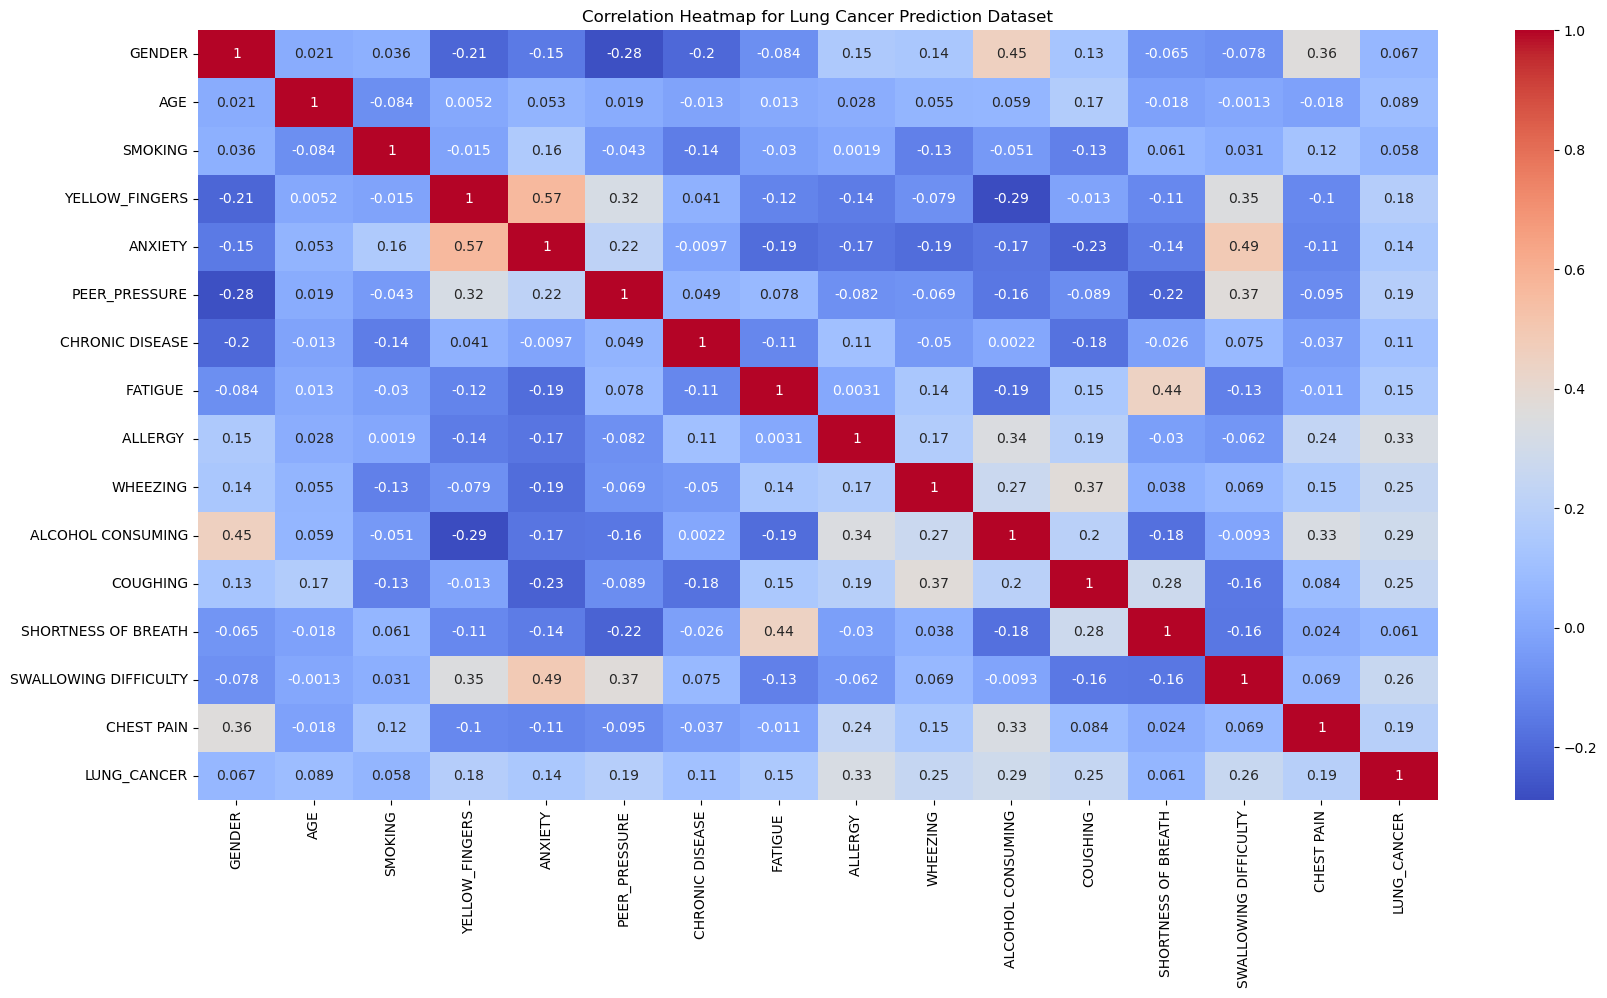

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Lung Cancer Prediction Dataset")
plt.show()

## Splitting Features and Label


In [16]:
X=dataframe.drop('LUNG_CANCER',axis=1)
Y=dataframe['LUNG_CANCER']


In [17]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [18]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int32

## Data Standardization

In [19]:
scaler=StandardScaler()

## SPLITTING DATA INTO TRAIN DATA AND TEST DATA 

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [23]:
print("After SMOTE class distribution:", Counter(Y_train))

After SMOTE class distribution: Counter({1: 216, 0: 216})


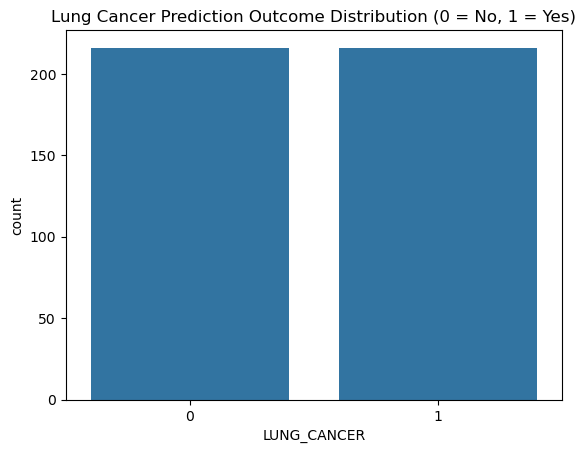

In [24]:
sns.countplot(x=Y_train)
plt.title("Lung Cancer Prediction Outcome Distribution (0 = No, 1 = Yes)")
plt.show()

In [25]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(309, 15) (432, 15) (62, 15)
(309,) (432,) (62,)


## Model training 

In [26]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'logistic_reg': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}  
    }
}

# Store results
best_models = []
#key value pair 
for name, mp in model_params.items():
    #  use for training cv=> cross validation choose on the bses of accuracy 
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    # fitiing the data on current model
    clf.fit(X_train, Y_train)

    best_models.append({
        'model': name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'final_model': clf.best_estimator_
    })
    print(f"{name} best CV accuracy: {clf.best_score_:.4f}")
    print(f"Best params: {clf.best_params_}\n")


decision_tree best CV accuracy: 0.9354
Best params: {'criterion': 'gini', 'max_depth': None}

logistic_reg best CV accuracy: 0.9329
Best params: {'C': 1, 'solver': 'liblinear'}

knn best CV accuracy: 0.9283
Best params: {'n_neighbors': 3}

naive_bayes best CV accuracy: 0.8773
Best params: {}



In [27]:
best_model_info = max(best_models, key=lambda x: x['best_score'])
final_model = best_model_info['final_model']
print(f"The best model has a score of {best_model_info['best_score']} and is {final_model}.")

The best model has a score of 0.935364875701684 and is DecisionTreeClassifier().


## Model Evaluation

### Predict accuracy of Trained data

In [28]:
X_train_prediction =final_model.predict(X_train)
prediction1=accuracy_score(X_train_prediction,Y_train)
print("Accuracy of Train data : ",prediction1)


Accuracy of Train data :  0.9976851851851852


### Predict accuracy of Test Data

In [29]:
X_test_predict=final_model.predict(X_test)

prediction2=accuracy_score(X_test_predict,Y_test)
print("Accuracy of Test data : ",prediction2)


Accuracy of Test data :  0.9032258064516129


In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(X_test_predict,Y_test)
print('Confusion matrix : \n',cm)


cr=classification_report(X_test_predict,Y_test)
print('Classification Report  :\n ',cr)

Confusion matrix : 
 [[ 4  2]
 [ 4 52]]
Classification Report  :
                precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.96      0.93      0.95        56

    accuracy                           0.90        62
   macro avg       0.73      0.80      0.76        62
weighted avg       0.92      0.90      0.91        62



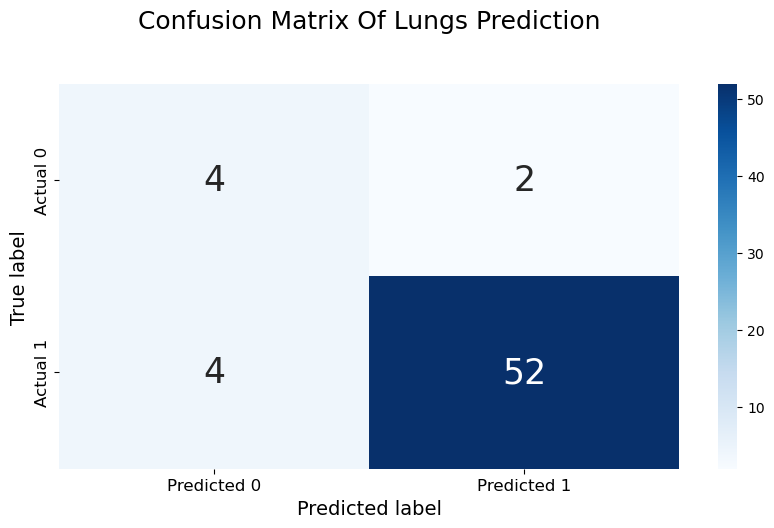

In [31]:
plt.figure(figsize=(10, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            annot_kws={"size": 25})  

plt.title('Confusion Matrix Of Lungs Prediction\n', pad=20, fontsize=18)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [32]:

report = classification_report(X_test_predict, Y_test, output_dict=True)
report_df = pd.DataFrame(cr).transpose()

# Plot classification report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Metrics')
plt.show()



ValueError: DataFrame constructor not properly called!

# Building Predictive System

### Take any random Input Data 

In [ ]:
## LUNG_CANCER = 1
input_data=(0,48,1,2,2,2,2,2,2,2,1,2,2,2,1)

## LUNG_CANCER = 0
# input_data=(1,59,1,2,2,1,1,1,1,1,1,1,1,2,2)

arr=np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

print(arr_reshaped)

[[ 0 48  1  2  2  2  2  2  2  2  1  2  2  2  1]]


### Standardize the Input Data 

In [ ]:
std_data =scaler.transform(arr_reshaped)

d:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Predict the output for input data 

In [ ]:
prediction3=final_model.predict(std_data)

if(prediction3[0]==1):
    print("Person has Lung cancer .")
else:
    print("Person does not have Lung cancer .") 




Person has Lung cancer .


In [ ]:
import pickle;


In [ ]:
filename='lung_cancer.sav'
pickle.dump(final_model,open(filename,'wb'))
pickle.dump(scaler,open('scaler2.sav','wb'))

In [ ]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model1=pickle.load(open('scaler2.sav','rb'))